In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [290]:
train_df = pd.read_csv('churn-bigml-80.csv')
test_df = pd.read_csv('churn-bigml-20.csv')

train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [291]:
train_df.shape, test_df.shape


((2666, 20), (667, 20))

In [292]:
train_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   str    
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   str    
 4   Voice mail plan         2666 non-null   str    
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   float64
 15

In [293]:
train_df['Churn'].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

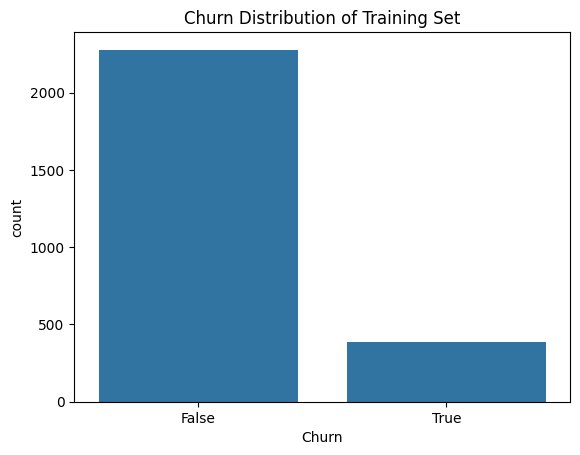

In [294]:
sns.countplot(x = 'Churn', data = train_df)
plt.title("Churn Distribution of Training Set")
plt.show()

In [295]:
train_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='str')

In [296]:
train_df['International plan'] = train_df['International plan'].map({'Yes': 1, 'No': 0})
train_df['Voice mail plan'] = train_df['Voice mail plan'].map({'Yes': 1, 'No': 0})

test_df['International plan'] = test_df['International plan'].map({'Yes': 1, 'No': 0})
test_df['Voice mail plan'] = test_df['Voice mail plan'].map({'Yes': 1, 'No': 0})

# Step 3: One-hot encode 'State' (drop first to avoid dummy variable trap)
train_df = pd.get_dummies(train_df, columns=['State'], drop_first=True)
test_df  = pd.get_dummies(test_df, columns=['State'], drop_first=True)

train_df.head()


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,False,False,False,False,False,False,False,False,False,False


In [297]:
X_train = train_df.drop("Churn", axis=1)
y_train = train_df["Churn"]

X_test = test_df.drop("Churn", axis=1)
y_test = test_df["Churn"]

X_train, X_test = X_train.align(X_test, join= 'left', axis = 1, fill_value = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2666, 68) (2666,)
(667, 68) (667,)


In [298]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter= 1000)

model.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [299]:
y_pred = model.predict(X_test)

In [300]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8455772113943029
Confusion Matrix:
 [[550  22]
 [ 81  14]]
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.96      0.91       572
        True       0.39      0.15      0.21        95

    accuracy                           0.85       667
   macro avg       0.63      0.55      0.56       667
weighted avg       0.80      0.85      0.81       667



In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names
features = X_train.columns

# Get coefficients from logistic regression
coefficients = model.coef_[0]

# Create a DataFrame
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficient
feature_importance['abs_coeff'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coeff', ascending=False)
feature_importance.head(10)  # top 10 most important features

,Feature,Coefficient,abs_coeff
2,International plan,1.956668,1.956668
60,State_TX,1.122555,1.122555
3,Voice mail plan,-1.047541,1.047541
62,State_VA,-0.995123,0.995123
57,State_SC,0.957994,0.957994
28,State_HI,-0.799058,0.799058
56,State_RI,-0.797491,0.797491
48,State_NJ,0.783256,0.783256
38,State_ME,0.774400,0.774400
65,State_WI,-0.762327,0.762327


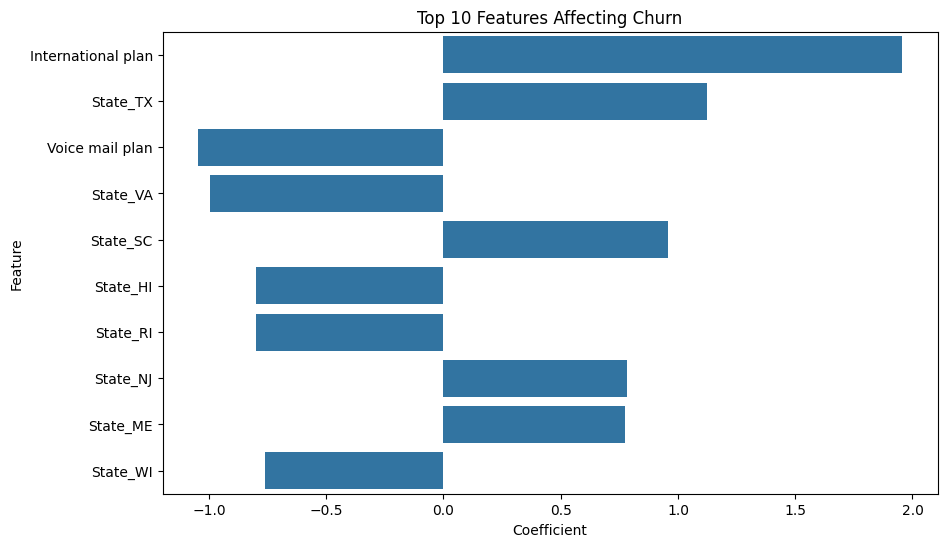

In [302]:
# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Features Affecting Churn")
plt.show()

In [ ]:
import pandas as pd
from openai import OpenAI

# 1. Initialize the client
client = OpenAI(api_key=""OPENAI_API_KEY")

def ai_retention_agent(reason_for_leaving, monthly_bill):
    # The model name MUST be "gpt-4o-mini" (with a hyphen, no spaces)
    response = client.chat.completions.create(
        model="gpt-4o-mini", 
        messages=[
            {"role": "system", "content": "You are a Customer Loyalty Expert."},
            {"role": "user", "content": f"A customer is leaving because of {reason_for_leaving}. Their bill is ${monthly_bill}. Write a 2-sentence email to keep them."}
        ]
    )
    return response.choices[0].message.content

# 2. Try it again!
try:
    print(ai_retention_agent("High International Calling rates", 75.50))
except Exception as e:
    print(f"Error: {e}")

Subject: We Value Your Business!

Dear [Customer's Name], we understand that international calling rates can be a concern, and we’re committed to finding ways to enhance your experience with us. As a valued customer, we would love to discuss tailored options that can help lower your bill while keeping you connected—let's chat!


In [304]:
# 1. Get predictions from your Random Forest model
# (Ensure X_test is the scaled version you created earlier)
predictions = model.predict(X_test)

# 2. Find the first 3 customers the AI thinks will leave (Churn == 1)
high_risk_indices = [i for i, val in enumerate(predictions) if val == 1][:3]

print(f"Found {len(high_risk_indices)} customers at risk. Generating emails...")

for idx in high_risk_indices:
    # Get the data for this specific customer
    # Note: test_df has been 'encoded', so 'State' is gone.
    customer = test_df.iloc[idx]
    
    # Identify the risk factors using the numeric columns
    calls = customer['Customer service calls']
    bill = customer['Total day charge']
    
    # Logic to decide the 'Reason' for the AI to address
    reason = "Frequent Service Issues" if calls > 3 else "High Billing Charges"
    
    try:
        # Call your AI Agent
        email = ai_retention_agent(reason, bill)
        
        # Print results using the Index since 'State' is gone
        print(f"\n--- Email for Customer Index: {idx} ---")
        print(f"Status: Predicted Churn | Calls: {calls} | Bill: ${bill:.2f}")
        print(f"AI Draft:\n{email}")
        print("-" * 30)
        
    except Exception as e:
        print(f"Error generating email for customer {idx}: {e}")

Found 3 customers at risk. Generating emails...

--- Email for Customer Index: 2 ---
Status: Predicted Churn | Calls: 4 | Bill: $56.59
AI Draft:
Subject: We Value Your Feedback

Dear [Customer's Name], we sincerely apologize for the recent service issues you've experienced and understand your frustration; we appreciate your loyalty and would like to offer you a 20% discount on your next bill to show our commitment to improving your experience. Please reach out, and let us know how we can make things right for you!
------------------------------

--- Email for Customer Index: 62 ---
Status: Predicted Churn | Calls: 4 | Bill: $50.39
AI Draft:
Subject: We're Here to Make Things Right

Dear [Customer's Name], we truly value you as a customer and understand your concerns regarding the service issues you've faced. Your satisfaction is our priority, and I would love to work together to resolve these matters and ensure you receive the high-quality experience you deserve.
----------------------

In [305]:
# Save your results to show a manager later
with open("retention_emails.txt", "w") as f:
    f.write("Generated Retention Emails\n")
    f.write("="*30 + "\n")
    # ... you can loop and write the emails here ...